In [8]:
import tensorflow as tf

In [9]:
encoder_input = tf.keras.layers.Input(shape=(4800), name="encoder_input")

encoder_dense_layer1 = tf.keras.layers.Dense(units=2400, name="encoder_dense_1")(encoder_input)
encoder_activ_layer1 = tf.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tf.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tf.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

In [10]:
encoder = tf.keras.models.Model(encoder_input, encoder_output, name="encoder_model")
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 4800)]            0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 2400)              11522400  
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 2400)              0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 2)                 4802      
_________________________________________________________________
encoder_output (LeakyReLU)   (None, 2)                 0         
Total params: 11,527,202
Trainable params: 11,527,202
Non-trainable params: 0
_________________________________________________________________


In [11]:
decoder_input = tf.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tf.keras.layers.Dense(units=2400, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tf.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tf.keras.layers.Dense(units=4800, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tf.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

In [14]:
decoder = tf.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 2400)              7200      
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 2400)              0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 4800)              11524800  
_________________________________________________________________
decoder_output (LeakyReLU)   (None, 4800)              0         
Total params: 11,532,000
Trainable params: 11,532,000
Non-trainable params: 0
_________________________________________________________________


In [15]:
ae_input = tf.keras.layers.Input(shape=(4800), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tf.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AE_input (InputLayer)        [(None, 4800)]            0         
_________________________________________________________________
encoder_model (Functional)   (None, 2)                 11527202  
_________________________________________________________________
decoder_model (Functional)   (None, 4800)              11532000  
Total params: 23,059,202
Trainable params: 23,059,202
Non-trainable params: 0
_________________________________________________________________


In [16]:
ae.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=0.0005))

In [17]:
from PIL import Image
import glob
import numpy as np 

In [18]:
images = []
for f in glob.iglob("./data/*"):
    images.append(np.asarray(Image.open(f)))
images = np.array(images)
images[0].shape

(60, 80, 3)

In [19]:
images[0].shape

(60, 80, 3)

In [20]:
images = np.mean(images, axis=3)
images

array([[[177.66666667, 178.66666667, 181.33333333, ..., 133.33333333,
         135.        , 145.        ],
        [177.66666667, 178.66666667, 180.33333333, ..., 139.66666667,
         138.66666667, 143.66666667],
        [176.66666667, 177.66666667, 180.33333333, ..., 145.33333333,
         148.33333333, 153.33333333],
        ...,
        [143.        , 145.        , 142.66666667, ..., 146.33333333,
         136.        , 141.66666667],
        [142.        , 142.        , 139.66666667, ..., 134.        ,
         128.        , 127.66666667],
        [142.        , 141.        , 137.66666667, ..., 117.        ,
         118.66666667, 122.        ]],

       [[176.66666667, 177.66666667, 180.33333333, ..., 135.33333333,
         136.        , 144.        ],
        [175.66666667, 176.66666667, 179.33333333, ..., 141.66666667,
         139.66666667, 142.66666667],
        [175.66666667, 176.66666667, 179.33333333, ..., 146.33333333,
         149.33333333, 152.33333333],
        ...,


In [21]:
images.shape

(1000, 60, 80)

In [22]:
images = images.astype("float32") / 255.0

In [23]:
X = np.reshape(images, newshape=(images.shape[0], np.prod(images.shape[1:])))

In [24]:
X_train = X[:800]
X_test = X[800:]

In [25]:
ae.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/20
4/4 [==============================] - 1s 157ms/step - loss: 0.2221 - val_loss: 0.0396
Epoch 2/20
4/4 [==============================] - 1s 125ms/step - loss: 0.0397 - val_loss: 0.0381
Epoch 3/20
4/4 [==============================] - 1s 131ms/step - loss: 0.0321 - val_loss: 0.0222
Epoch 4/20
4/4 [==============================] - 1s 134ms/step - loss: 0.0197 - val_loss: 0.0189
Epoch 5/20
4/4 [==============================] - 1s 219ms/step - loss: 0.0180 - val_loss: 0.0186
Epoch 6/20
4/4 [==============================] - 1s 148ms/step - loss: 0.0170 - val_loss: 0.0164
Epoch 7/20
4/4 [==============================] - 1s 126ms/step - loss: 0.0157 - val_loss: 0.0185
Epoch 8/20
4/4 [==============================] - 0s 121ms/step - loss: 0.0161 - val_loss: 0.0176
Epoch 9/20
4/4 [==============================] - 1s 141ms/step - loss: 0.0154 - val_loss: 0.0166
Epoch 10/20
4/4 [==============================] - 1s 175ms/step - loss: 0.0150 - val_loss: 0.0153
Epoch 11/20
4/4 [==

In [26]:
encoded_images = encoder.predict(X_train)
decoded_images = decoder.predict(encoded_images)

In [27]:
decoded_images_orig = np.reshape(decoded_images, newshape=(decoded_images.shape[0], 60, 80))

In [28]:
import matplotlib.pyplot

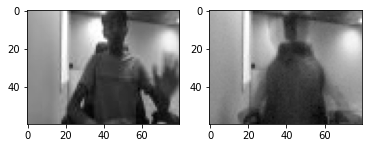

In [29]:
num_images_to_show = 1
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=X_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(images[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

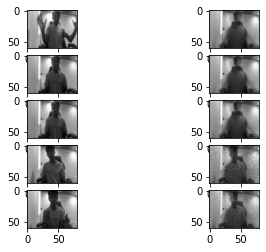

In [30]:
num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=X_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(images[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")